In [19]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rafi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
# Load dataset
df = pd.read_csv("reviews_scraped.csv")
print("Contoh data awal:")
print(df.head(5))

Contoh data awal:
              user                                             review  rating
0  Pengguna Google  aduhhh bahaya bngt aplikasi yng satu ini sakin...       5
1  Pengguna Google  LUAR BIASA CS TOKOPEDIA TIDAK ADA RESPON BER J...       1
2  Pengguna Google  Mungkin bisa hapus kerja sama dengan JNE karna...       4
3  Pengguna Google  Baru coba di Tokopedia apa sama dg Shopi grati...       4
4  Pengguna Google  ternyata aplikasi ini makin g jelas.g mampu me...       1


In [16]:
# 3. Labeling manual (contoh sementara)
# Positif: rating >=4, Netral: rating == 3, Negatif: rating <=2
def labeling(rating):
    if rating >= 4:
        return 'positif'
    elif rating == 3:
        return 'netral'
    else:
        return 'negatif'

df['label'] = df['rating'].apply(labeling)
print("\nDistribusi label setelah labeling otomatis:")
print(df['label'].value_counts())


Distribusi label setelah labeling otomatis:
label
positif    2181
negatif    1565
netral      254
Name: count, dtype: int64


In [17]:
# 4. Preprocessing
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text) # remove URL
    text = re.sub(r'[^a-zA-Z\s]', '', text) # remove special characters
    text = re.sub(r'\s+', ' ', text).strip() # remove multiple spaces
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_review'] = df['review'].apply(clean_text)
print('\nContoh hasil preprocessing:')
print(df[['review', 'clean_review']].head(5))


Contoh hasil preprocessing:
                                              review  \
0  aduhhh bahaya bngt aplikasi yng satu ini sakin...   
1  LUAR BIASA CS TOKOPEDIA TIDAK ADA RESPON BER J...   
2  Mungkin bisa hapus kerja sama dengan JNE karna...   
3  Baru coba di Tokopedia apa sama dg Shopi grati...   
4  ternyata aplikasi ini makin g jelas.g mampu me...   

                                        clean_review  
0  aduhhh bahaya bngt aplikasi yng saking bagus n...  
1  cs tokopedia respon ber jam balas bohong aqila...  
2  hapus kerja jne karna telat ngirim paket gak k...  
3  coba tokopedia dg shopi gratis ongkirnya reels...  
4  aplikasi g jelasg kerja custemer services manu...  


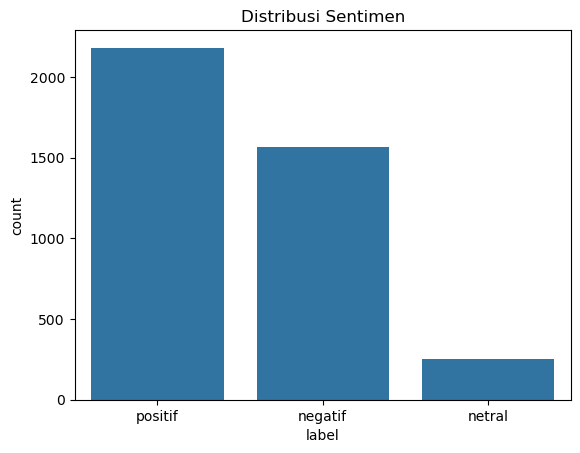

In [20]:
# 5. Visualisasi distribusi label
sns.countplot(x='label', data=df)
plt.title('Distribusi Sentimen')
plt.show()

In [21]:
# 6. Vectorization
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X = tfidf.fit_transform(df['clean_review'])
y = df['label']

print("\nShape hasil TF-IDF:")
print(X.shape)


Shape hasil TF-IDF:
(4000, 5000)


In [23]:
# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain size:", X_train.shape[0]," | Test size:", X_test.shape[0])


Train size: 3200  | Test size: 800


In [24]:
# 8. Training model (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("\nModel berhasil dilatih!")


Model berhasil dilatih!


In [25]:
# 9. Evaluation
y_pred = model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.81625

Confusion matrix:
[[266   0  46]
 [ 37   0  12]
 [ 52   0 387]]

Classification report:
              precision    recall  f1-score   support

     negatif       0.75      0.85      0.80       312
      netral       0.00      0.00      0.00        49
     positif       0.87      0.88      0.88       439

    accuracy                           0.82       800
   macro avg       0.54      0.58      0.56       800
weighted avg       0.77      0.82      0.79       800



c:\Users\Rafi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Rafi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


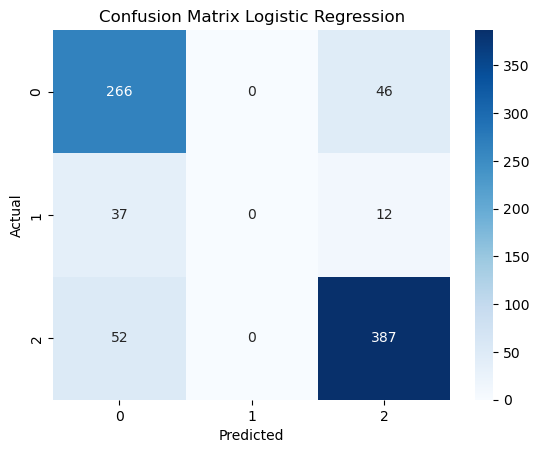

In [26]:
# 10. Visualisasi Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression")
plt.show()